# Broadband Diana

In [3]:
import numpy as np
import pandas as pd
from obspy.core.utcdatetime import UTCDateTime
import obspy
import scipy
import matplotlib.pyplot as plt
import datetime

In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

### Specify start and enddate

In [4]:
dst = UTCDateTime('2022-05-27T18:00:00')
dend = UTCDateTime('2022-05-31T23:59:00')

In [4]:
pre_filt = [0.0001, 0.001, 90, 100]

### Importing raw HHN component and export with detrend and instrument correction

In [5]:
traceN = obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/27/GT.RNTR6..HHN_centaur-6_3644_20220527_000000.miniseed', starttime=dst, endtime=dend)

traceN += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/28/GT.RNTR6..HHN_centaur-6_3644_20220528_000000.miniseed', starttime=dst, endtime=dend)

traceN += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/29/GT.RNTR6..HHN_centaur-6_3644_20220529_000000.miniseed', starttime=dst, endtime=dend)
traceN += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/30/GT.RNTR6..HHN_centaur-6_3644_20220530_000000.miniseed', starttime=dst, endtime=dend)
traceN += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/31/GT.RNTR6..HHN_centaur-6_3644_20220531_000000.miniseed', starttime=dst, endtime=dend)

C:\Users\julie\anaconda3\envs\bas2\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


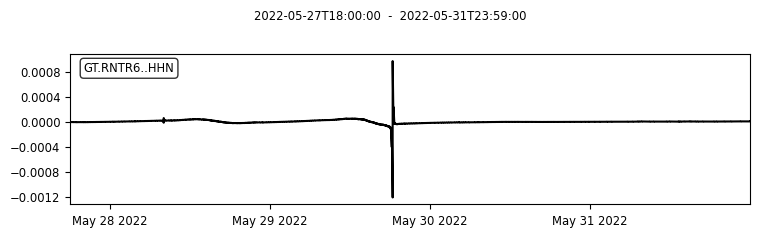

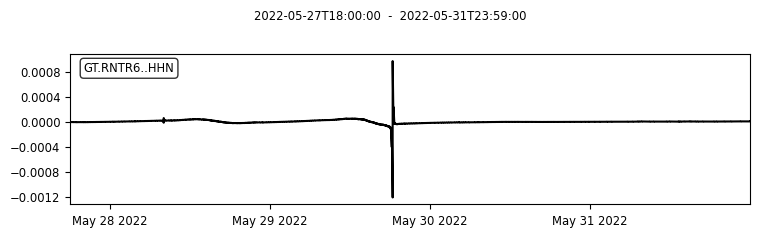

In [6]:
# merging
traceN.merge()
# detrend
traceN.detrend()
# read metadata with instrument response
invN = obspy.read_inventory("D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/HHN_BB.RESP" )
# remove response
traceN.remove_response(inventory=invN, output = 'DISP')#, pre_filt = pre_filt)
# export corrected trace
traceN[0].write("./Grims_Varia/DISP-Corrected-HHN_centaur-6_27052022to31052022.mseed", format="MSEED")  
# plotting
traceN.plot()

### Importing raw HHE component and export with detrend and instrument correction

In [ ]:
traceE = obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/27/GT.RNTR6..HHE_centaur-6_3644_20220527_000000.miniseed', starttime=dst, endtime=dend)

traceE += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/28/GT.RNTR6..HHE_centaur-6_3644_20220528_000000.miniseed', starttime=dst, endtime=dend)

traceE += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/29/GT.RNTR6..HHE_centaur-6_3644_20220529_000000.miniseed', starttime=dst, endtime=dend)
traceE += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/30/GT.RNTR6..HHE_centaur-6_3644_20220530_000000.miniseed', starttime=dst, endtime=dend)
traceE += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/31/GT.RNTR6..HHE_centaur-6_3644_20220531_000000.miniseed', starttime=dst, endtime=dend)

C:\Users\julie\anaconda3\envs\bas2\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


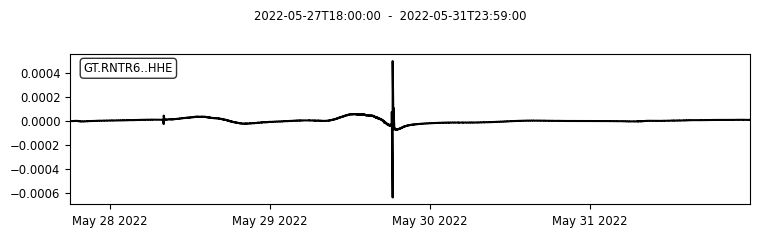

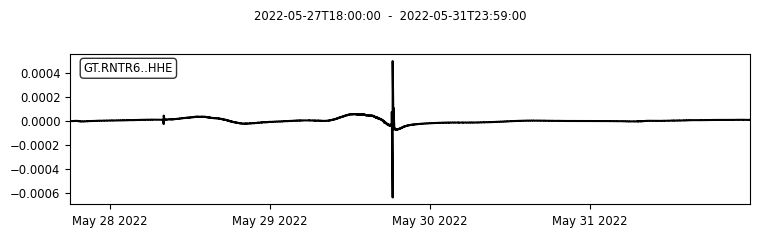

In [8]:
traceE.merge()

traceE.detrend()

invE = obspy.read_inventory("D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/HHE_BB.RESP" )

traceE.remove_response(inventory=invE, output = 'DISP')#, pre_filt = pre_filt)

traceE[0].write("./Grims_Varia/DISP-Corrected-HHE_centaur-6_27052022to31052022.mseed", format="MSEED")  

traceE.plot()

### Importing raw HHZ component and export with detrend and instrument correction

In [9]:
traceZ = obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/27/GT.RNTR6..HHZ_centaur-6_3644_20220527_000000.miniseed', starttime=dst, endtime=dend)

traceZ += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/28/GT.RNTR6..HHZ_centaur-6_3644_20220528_000000.miniseed', starttime=dst, endtime=dend)

traceZ += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/29/GT.RNTR6..HHZ_centaur-6_3644_20220529_000000.miniseed', starttime=dst, endtime=dend)
traceZ += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/30/GT.RNTR6..HHZ_centaur-6_3644_20220530_000000.miniseed', starttime=dst, endtime=dend)
traceZ += obspy.read('D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/2022/05/31/GT.RNTR6..HHZ_centaur-6_3644_20220531_000000.miniseed', starttime=dst, endtime=dend)

C:\Users\julie\anaconda3\envs\bas2\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


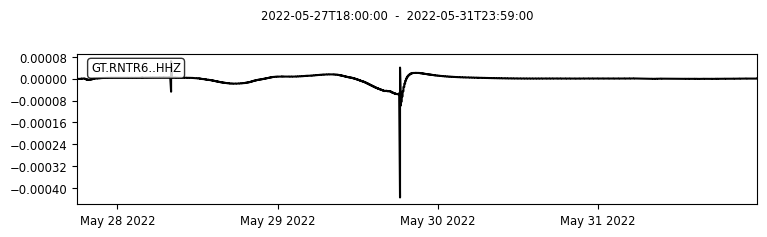

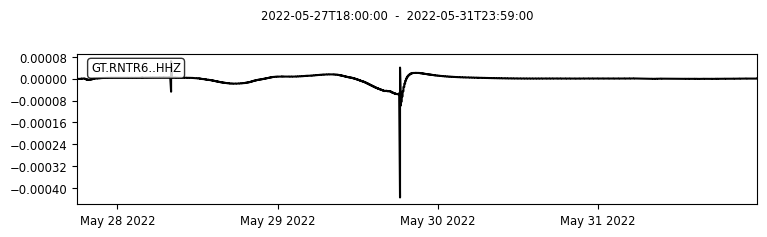

In [10]:
traceZ.merge()

traceZ.detrend()

invZ = obspy.read_inventory("D:/DIANA-NANOMETRICS-DATA-GLACIER-a5/HHZ_BB.RESP" )

traceZ.remove_response(inventory=invZ, output = 'DISP')#, pre_filt = pre_filt)

traceZ[0].write("./Grims_Varia/DISP-Corrected-HHZ_centaur-6_27052022to31052022.mseed", format="MSEED")  

traceZ.plot()

### Importing corrected trace

In [45]:
traceN = obspy.read("./Grims_Varia/DISP-Corrected-HHN_centaur-6_27052022to31052022.mseed")
traceE = obspy.read("./Grims_Varia/DISP-Corrected-HHE_centaur-6_27052022to31052022.mseed")
traceZ = obspy.read("./Grims_Varia/DISP-Corrected-HHZ_centaur-6_27052022to31052022.mseed")

In [46]:
traceZ = obspy.read("./Grims_Varia/DISP-Corrected-HHZ_centaur-6_27052022to31052022.mseed")
dt = np.arange(0,traceZ[0].stats.npts) #make array which its length = trace length
dt = dt*traceZ[0].stats.delta #array of dt from starttime
trtime = dt.astype('timedelta64[s]') + np.datetime64(traceZ[0].stats.starttime)
ftZ = traceZ.filter("highpass", freq=0.05).filter('lowpass', freq=0.5)

st = UTCDateTime('2022-05-30T06:20:00')
end = UTCDateTime('2022-05-30T18:23:00')
plt.plot(trtime, ftZ[0])
#plt.xlim(st, end)
plt.ylim(-.25e-6, .25e-6)

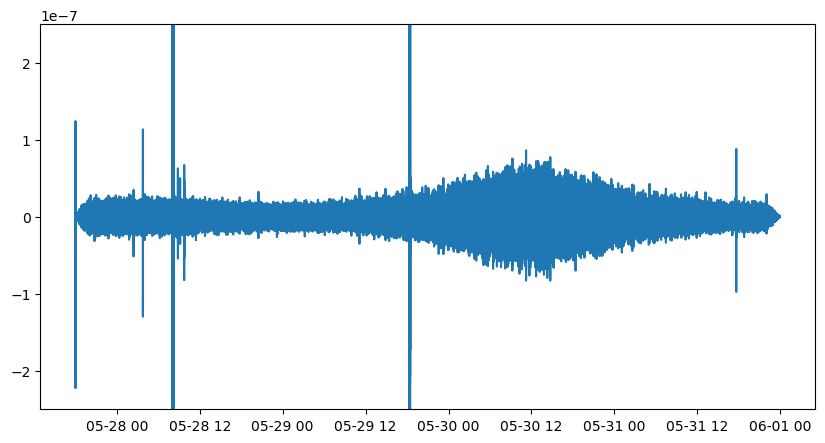

In [50]:
import matplotlib.patches as mpt

fig = plt.figure(figsize=(10,5))
st = UTCDateTime('2022-05-30T06:20:00')
end = UTCDateTime('2022-05-30T18:23:00')
plt.plot(trtime, ftZ[0])
#plt.xlim(st, end)
plt.ylim(-.25e-6, .25e-6)

for i in range(2) :
    sttdate = np.datetime64('2022-05-07T18:00') + 6*3600*i
    mpt.Rectangle((sttdate,-0.25e-6), 6*3600, .5e-6)

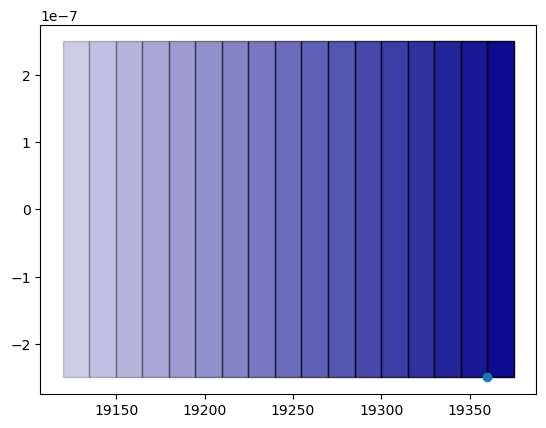

In [71]:
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots()

for i in range(17) :
    sttdate = np.datetime64('2022-05-07T18:00') + (6*3600*i)
    rect = mpt.Rectangle((sttdate,-0.25e-6), 6*3600, .5e-6, facecolor='darkblue', alpha=0.2+0.8*i/17, edgecolor='k')
    ax.add_patch(rect)
ax.scatter(sttdate,-0.25e-6)


In [21]:
traceN[0].stats

         network: GT
         station: RNTR6
        location: 
         channel: HHN
       starttime: 2022-05-27T18:00:00.000000Z
         endtime: 2022-05-31T23:59:00.000000Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 91785001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1610264, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 824455168})

In [5]:
dt = np.arange(0,traceN[0].stats.npts) #make array which its length = trace length
dt = dt*traceN[0].stats.delta #array of dt from starttime
trtime = dt.astype('timedelta64[s]') + np.datetime64(traceN[0].stats.starttime)

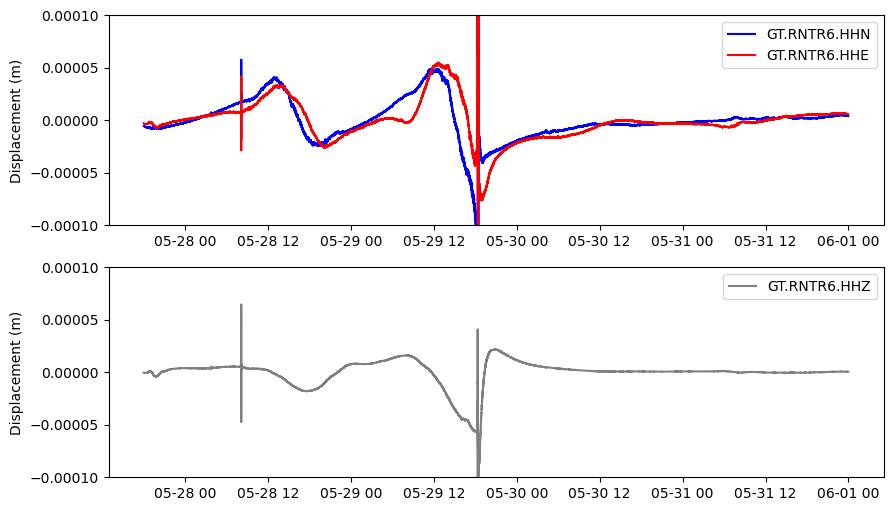

In [9]:
fig, ax =  plt.subplots(nrows = 2, figsize=(10,6))
#t.plot()
ax[0].plot(trtime,traceN[0], label='GT.RNTR6.HHN', c='b')
ax[0].plot(trtime,traceE[0], label='GT.RNTR6.HHE', c='r')
ax[1].plot(trtime,traceZ[0], label='GT.RNTR6.HHZ', c='grey')

ax[0].set_ylim(-.0001,.0001)
ax[1].set_ylim(-.0001,.0001)
ax[0].set_ylabel('Displacement (m)')
ax[1].set_ylabel('Displacement (m)')


ax[0].legend()
ax[1].legend()

Text(0, 0.5, 'Displacement (m)\nEast component')

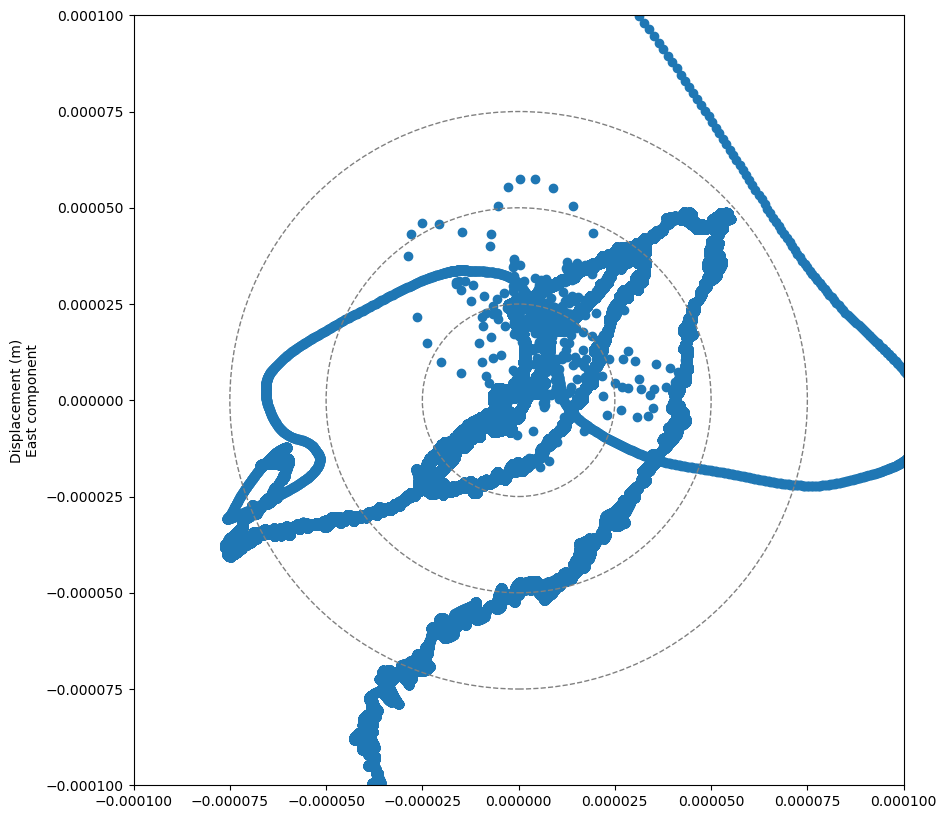

In [42]:
figure, axes = plt.subplots(figsize=(5,5))
#retrtime

retraceE = traceE[0].resample(10)
retraceN = traceN[0].resample(10)

plt.scatter(retraceE,retraceN)

for i in [2.5e-5, 5e-5, 7.5e-5]: 
    cc = plt.Circle((0, 0), i, fill=False, ec='grey', ls='--')
    axes.set_aspect(1)
    axes.add_artist(cc)
plt.xlim(-.0001,.0001)
plt.ylim(-.0001,.0001)

plt.ylabel('Displacement (m)\nNorth component')
plt.xlabel('Displacement (m)\nEast component')

## Comparison gauging station

In [9]:
V159 = pd.read_csv('./Grims_Varia/vdv_data_20230618154039.csv', delimiter=';', decimal=',')

In [10]:
V159

,Time,Gígja_800: W1_med_cm[cm],Gígja_800: W1_med_cm_Max[cm],Gígja_800: W1_med_cm_Min[cm]
0,2022-05-27 00:00:00,-47.97,-47.78,-47.97
1,2022-05-27 00:03:00,-48.01,-47.86,-48.02
2,2022-05-27 00:06:00,-47.76,-47.76,-48.08
3,2022-05-27 00:09:00,-47.91,-47.73,-47.98
4,2022-05-27 00:12:00,-47.88,-47.88,-47.99
...,...,...,...,...
2731,2022-06-01 23:42:00,-45.26,-45.15,-45.50
2732,2022-06-01 23:45:00,-45.42,-45.22,-45.42
2733,2022-06-01 23:48:00,-45.35,-45.25,-45.43
2734,2022-06-01 23:51:00,-45.34,-45.22,-45.38


In [17]:
ggTime = np.array(V159['Time'], dtype='datetime64[s]')

In [18]:
ggheight = V159["Gígja_800: W1_med_cm[cm]"]

(19139.75, 19143.999305555557)

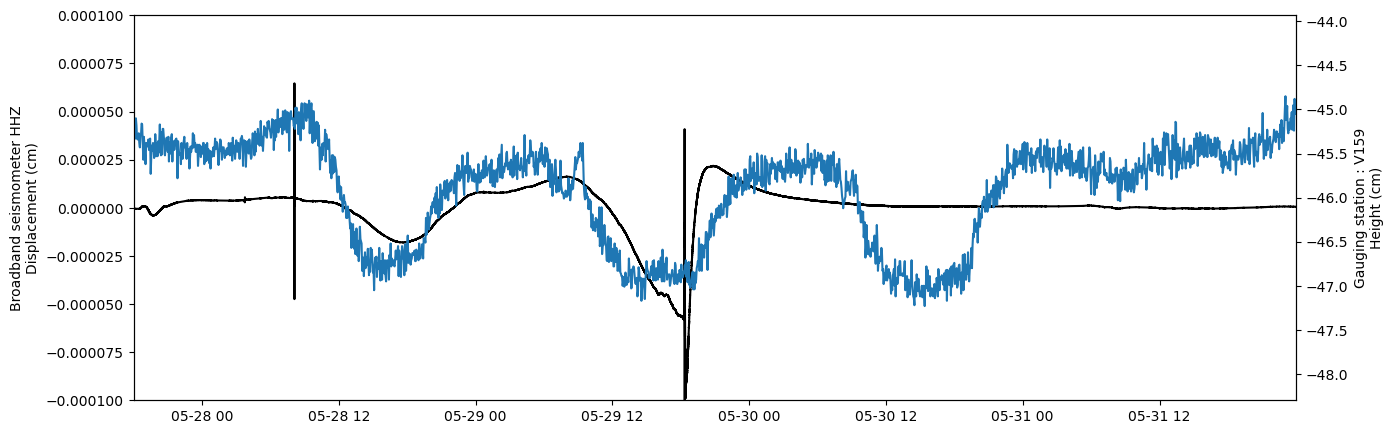

In [19]:
fig, ax1 = plt.subplots(figsize=(15,5))
#t.plot()
ax1.plot(trtime,traceZ[0],c='k')
ax1.set_ylim(-.0001,.0001)
ax1.set_ylabel('Broadband seismometer HHZ\nDisplacement (m)')

ax2 = ax1.twinx()

ax2.plot(ggTime, ggheight)
#ax2.plot(ggTime-10*3600,ggheight, c='blue', ls='--')
ax2.set_ylabel('Gauging station : V159\nHeight (cm)')
plt.xlim(trtime[0],trtime[-1])

## Comparison snowmelt

In [62]:
import netCDF4 as nc

In [63]:
import numpy as np

# Thanks to unutbu

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [64]:
data = './temp-precip/era5-island.nc'
ds = nc.Dataset(data)

In [65]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-03-21 16:44:46 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data8/adaptor.mars.internal-1679417074.8680806-11952-13-0535f1b1-ae53-430f-bd02-a41c35b01720.nc /cache/tmp/0535f1b1-ae53-430f-bd02-a41c35b01720-adaptor.mars.internal-1679416861.7139752-11952-8-tmp.grib
    dimensions(sizes): longitude(53), latitude(17), time(744)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 t2m(time, latitude, longitude), int16 ptype(time, latitude, longitude), int16 sst(time, latitude, longitude), int16 rsn(time, latitude, longitude), int16 sf(time, latitude, longitude), int16 smlt(time, latitude, longitude), int16 tp(time, latitude, longitude)
    groups: 


In [66]:
print(ds.__dict__)

{'Conventions': 'CF-1.6', 'history': '2023-03-21 16:44:46 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data8/adaptor.mars.internal-1679417074.8680806-11952-13-0535f1b1-ae53-430f-bd02-a41c35b01720.nc /cache/tmp/0535f1b1-ae53-430f-bd02-a41c35b01720-adaptor.mars.internal-1679416861.7139752-11952-8-tmp.grib'}


In [67]:
LON = list(ds['longitude'][:])
LAT = list(ds['latitude'][:])

prcp = np.array(ds['tp'][:])
temp = np.array(ds['t2m'][:])
smlt = np.array(ds['smlt'][:])

In [68]:
time = np.array(ds['time'][:])
origin = datetime.datetime(1900,1,1)
Tcfd = []
for h in time :
    Tcfd.append(origin + datetime.timedelta(hours = float(h)))

In [69]:
lat = 64.416089
lon = -17.344179
PREP = []
TEMP = []
SMLT = []

idxLat = find_nearest(LAT, lat)
idxLong = find_nearest(LON, lon)

for t in range(len(time)) :
    PREP.append(float(prcp[t][idxLat][idxLong]))
    TEMP.append(float(temp[t][idxLat][idxLong]))
    SMLT.append(float(smlt[t][idxLat][idxLong]))

Text(0, 0.5, 'Broadband seismometer\nDisplacement (cm)')

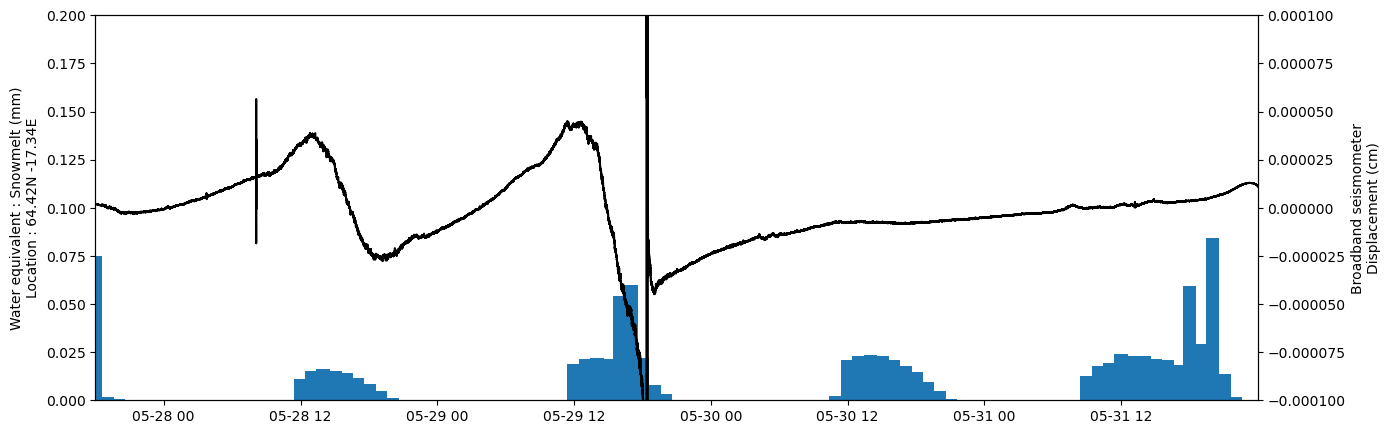

In [77]:
fig, ax2 = plt.subplots(figsize=(15,5))
#t.plot()

ax2.bar(Tcfd, np.array(SMLT)*1000,width = .05)
ax2.set_ylabel('Water equivalent : Snowmelt (mm)\nLocation : %.2fN %.2fE' %(lat,lon))
ax2.set_ylim(0,.2)
plt.xlim(XXX[0],XXX[-1])

ax1 = ax2.twinx()

ax1.plot(XXX,trace[0],c='k')
ax1.set_ylim(-.0001,.0001)
ax1.set_ylabel('Broadband seismometer\nDisplacement (m)')

## Detrend + FFT

In [17]:
yf = scipy.fftpack.fft(traceN[0])
dt = traceN[0].stats.delta
npts = traceN[0].stats.npts
xf = np.linspace(0.0, 1.0/(dt), int(npts))

C:\Users\julie\AppData\Local\Temp\ipykernel_114152\2329740781.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(xf[0],40)


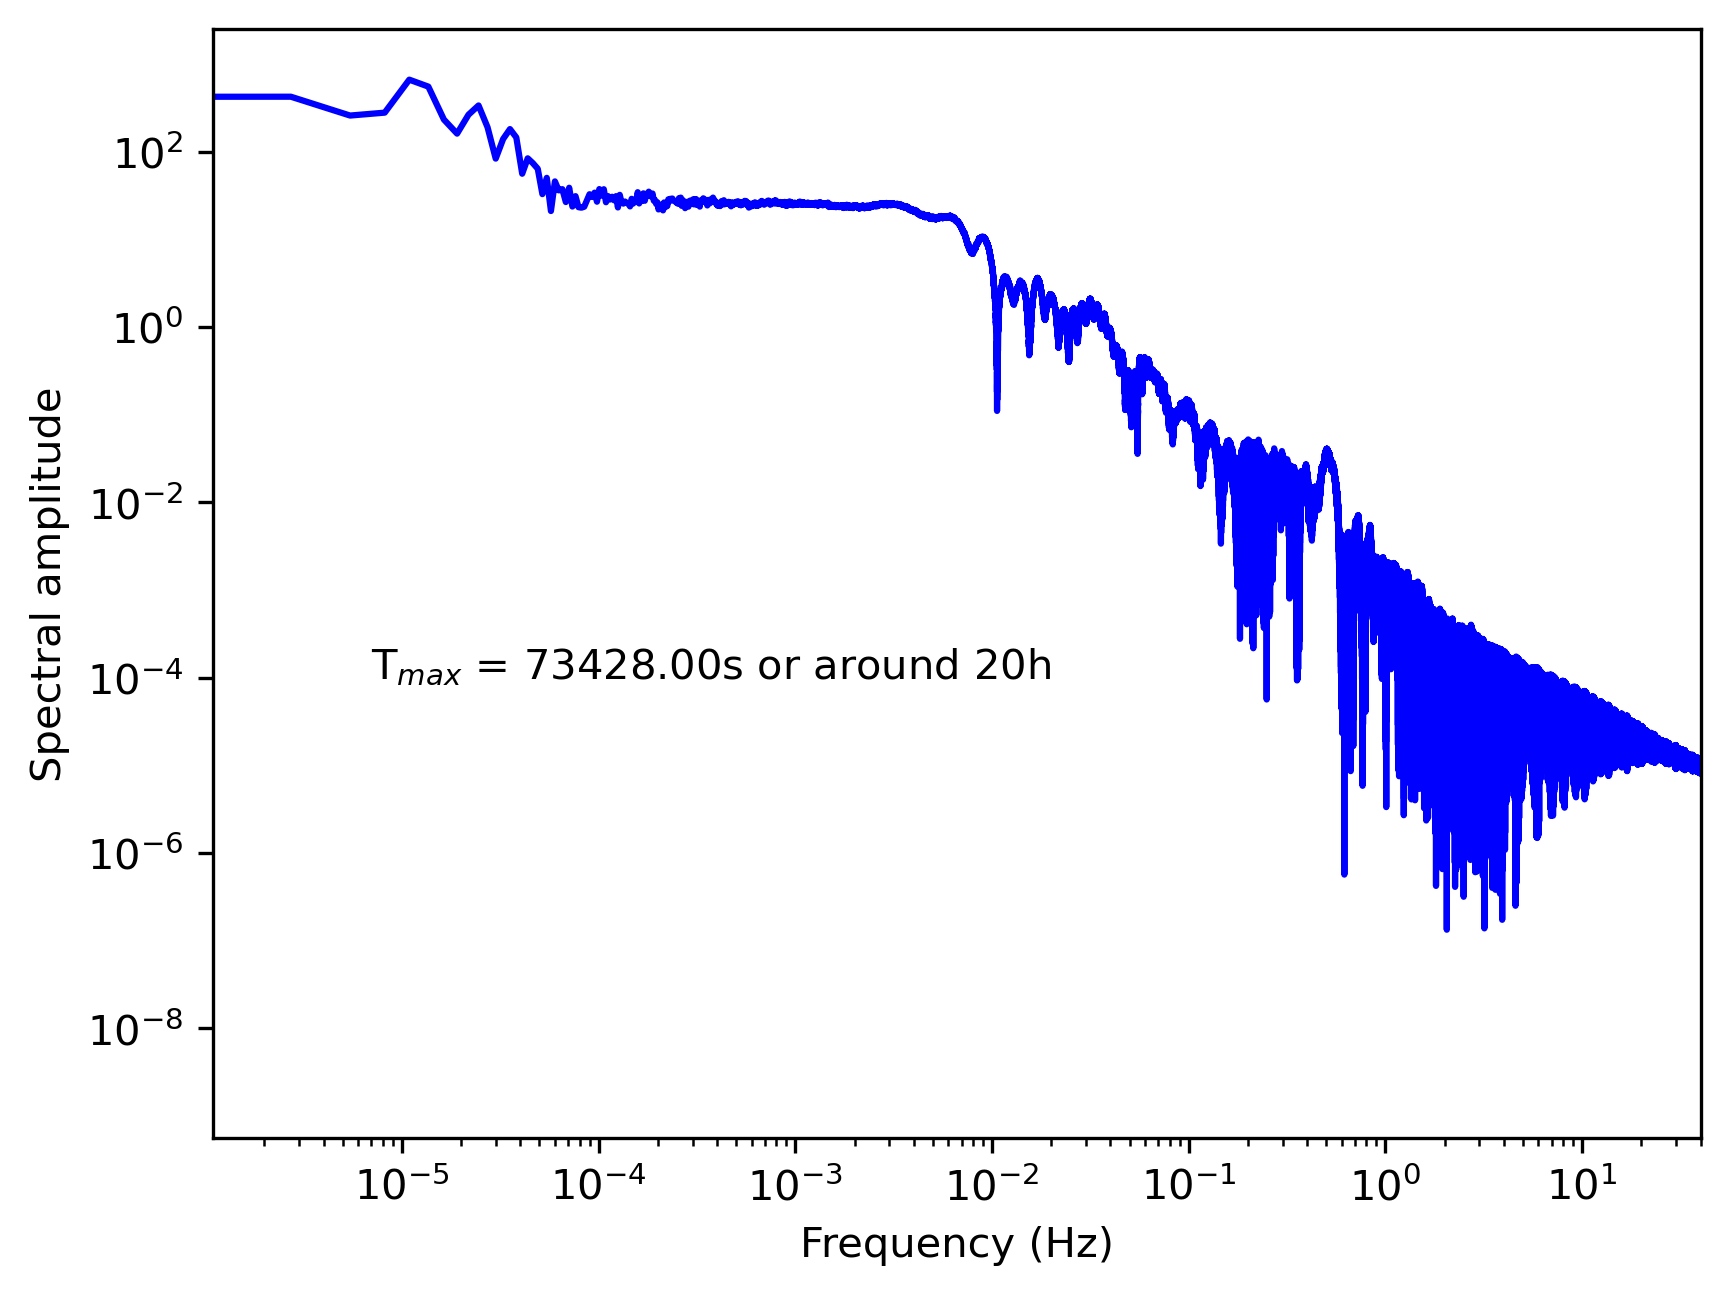

In [18]:
fig = plt.figure(dpi=300)
plt.plot(xf, 1*np.abs(yf[:npts]),color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlim(xf[0],40)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral amplitude')
ymax = np.max(yf[:npts])
idxYmax = np.argmax(yf[:npts])

plt.text(7e-6, 1e-4, 'T$_{max}$ = %.2fs or around %ih' %(1/xf[idxYmax], (1/xf[idxYmax])/3600))

plt.savefig('./Grims_Varia/fft_bb_HHN.png', bbox_inches='tight')

plt.show()

## Highpass filter

C:\Users\julie\anaconda3\lib\site-packages\obspy\imaging\util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 12.
  plt.setp(ax.get_xticklabels(), fontsize='small')
C:\Users\julie\anaconda3\lib\site-packages\obspy\imaging\waveform.py:815: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 12.
  plt.setp(ax.get_xticklabels(), fontsize='small',


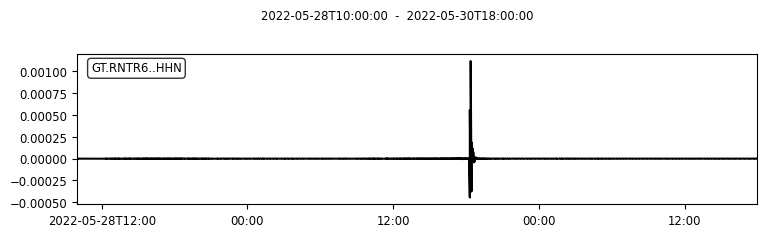

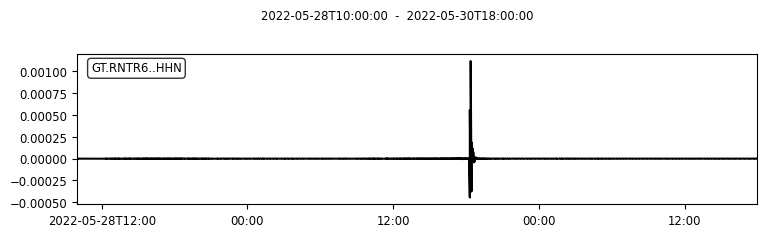

In [29]:
ft = t.filter("highpass", freq=0.001)
ft.plot()

Text(0, 0.5, 'Amplitudes')

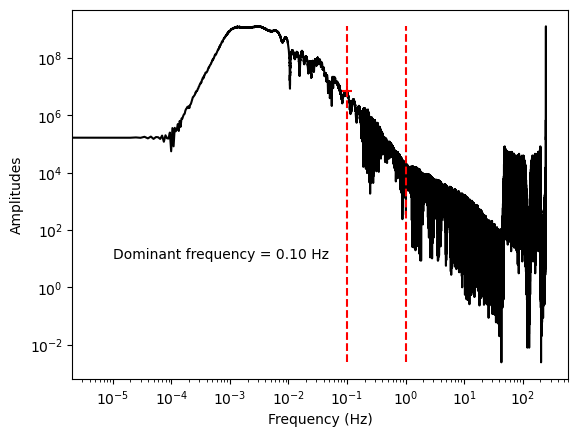

In [30]:
yf = scipy.fftpack.fft(ft[0])

y = npts * np.abs(yf[:npts])

ym = [np.min(y), np.max(y)]

dt = t[0].stats.delta
npts = t[0].stats.npts
xf = np.linspace(0.0, 1.0/(dt), int(npts))

plt.plot(xf, y,color='k')

plt.plot([.1,.1],ym,c='r',ls='--')
plt.plot([1,1],ym,c='r',ls='--')

idmin = find_nearest(xf,.1)
idmax = find_nearest(xf,1)

yfmax = np.argmax(yf[idmin:idmax]) 

#plt.xlim(.1,1)

plt.scatter(xf[idmin+yfmax], y[idmin+yfmax], c='r', marker='+', s=50, zorder=10)
plt.text(.1*10**-4, 10**1, 'Dominant frequency = %.2f Hz'%xf[idmin+yfmax])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudes')

## Plotting FFT per 6 hours between 0.05 and 0.5Hz

In [37]:
def mihauteur(L, tmpfrq, f0, plot = False) :
    
    frqmax = find_nearest(tmpfrq, f0)
    #print(frqmax, f0, tmpfrq[frqmax])
    for i, j in enumerate(L[frqmax:]) :
        if i != 0 :
            if j > k :
                min1 = k
                posMin1 = i+frqmax
                break
            else :
                min1 = j
                posMin1 = i+frqmax
        k = j
    k = L[frqmax]   
    for i in range(len(L[0:frqmax]), 0 , -1) :
        #print(i)
        j = L[i]
        #print(j)
        if j > k :
            min2 = k
            posMin2 = i
            break
        else :
            min2 = j
            posMin2 = i
        k = j

    mid1 = L[frqmax] - (L[frqmax] - min1)/2
    mid2 = L[frqmax] - (L[frqmax] - min2)/2

    argMid1 = find_nearest(L[frqmax:posMin1], mid1) + frqmax
    argMid2 = find_nearest(L[posMin2:frqmax], mid2) + posMin2

    meanMH = ((tmpfrq[argMid1] - tmpfrq[frqmax]) + (tmpfrq[frqmax] - tmpfrq[argMid2]))/2
    #print(meanMH)

    if plot == True :
        fig = plt.figure()
        plt.plot(tmpfrq, L)
        plt.errorbar(tmpfrq[frqmax], L[frqmax], xerr=meanMH, c='r')

        plt.scatter(tmpfrq[posMin1], min1)
        plt.scatter(tmpfrq[posMin2], min2)

        plt.scatter(tmpfrq[argMid1], mid1, c='r', marker='+')
        plt.scatter(tmpfrq[argMid2], mid2, c='blue', marker='+')

        plt.xlim(tmpfrq[frqmax]-1, tmpfrq[frqmax]+1)
        
        plt.show()
    
    return tmpfrq[argMid2], tmpfrq[argMid1], meanMH 

In [19]:
import datetime
import pandas as pd
import fast_konno_ohmachi as fko
import matplotlib.dates as mdates
from matplotlib.collections import PatchCollection

In [39]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

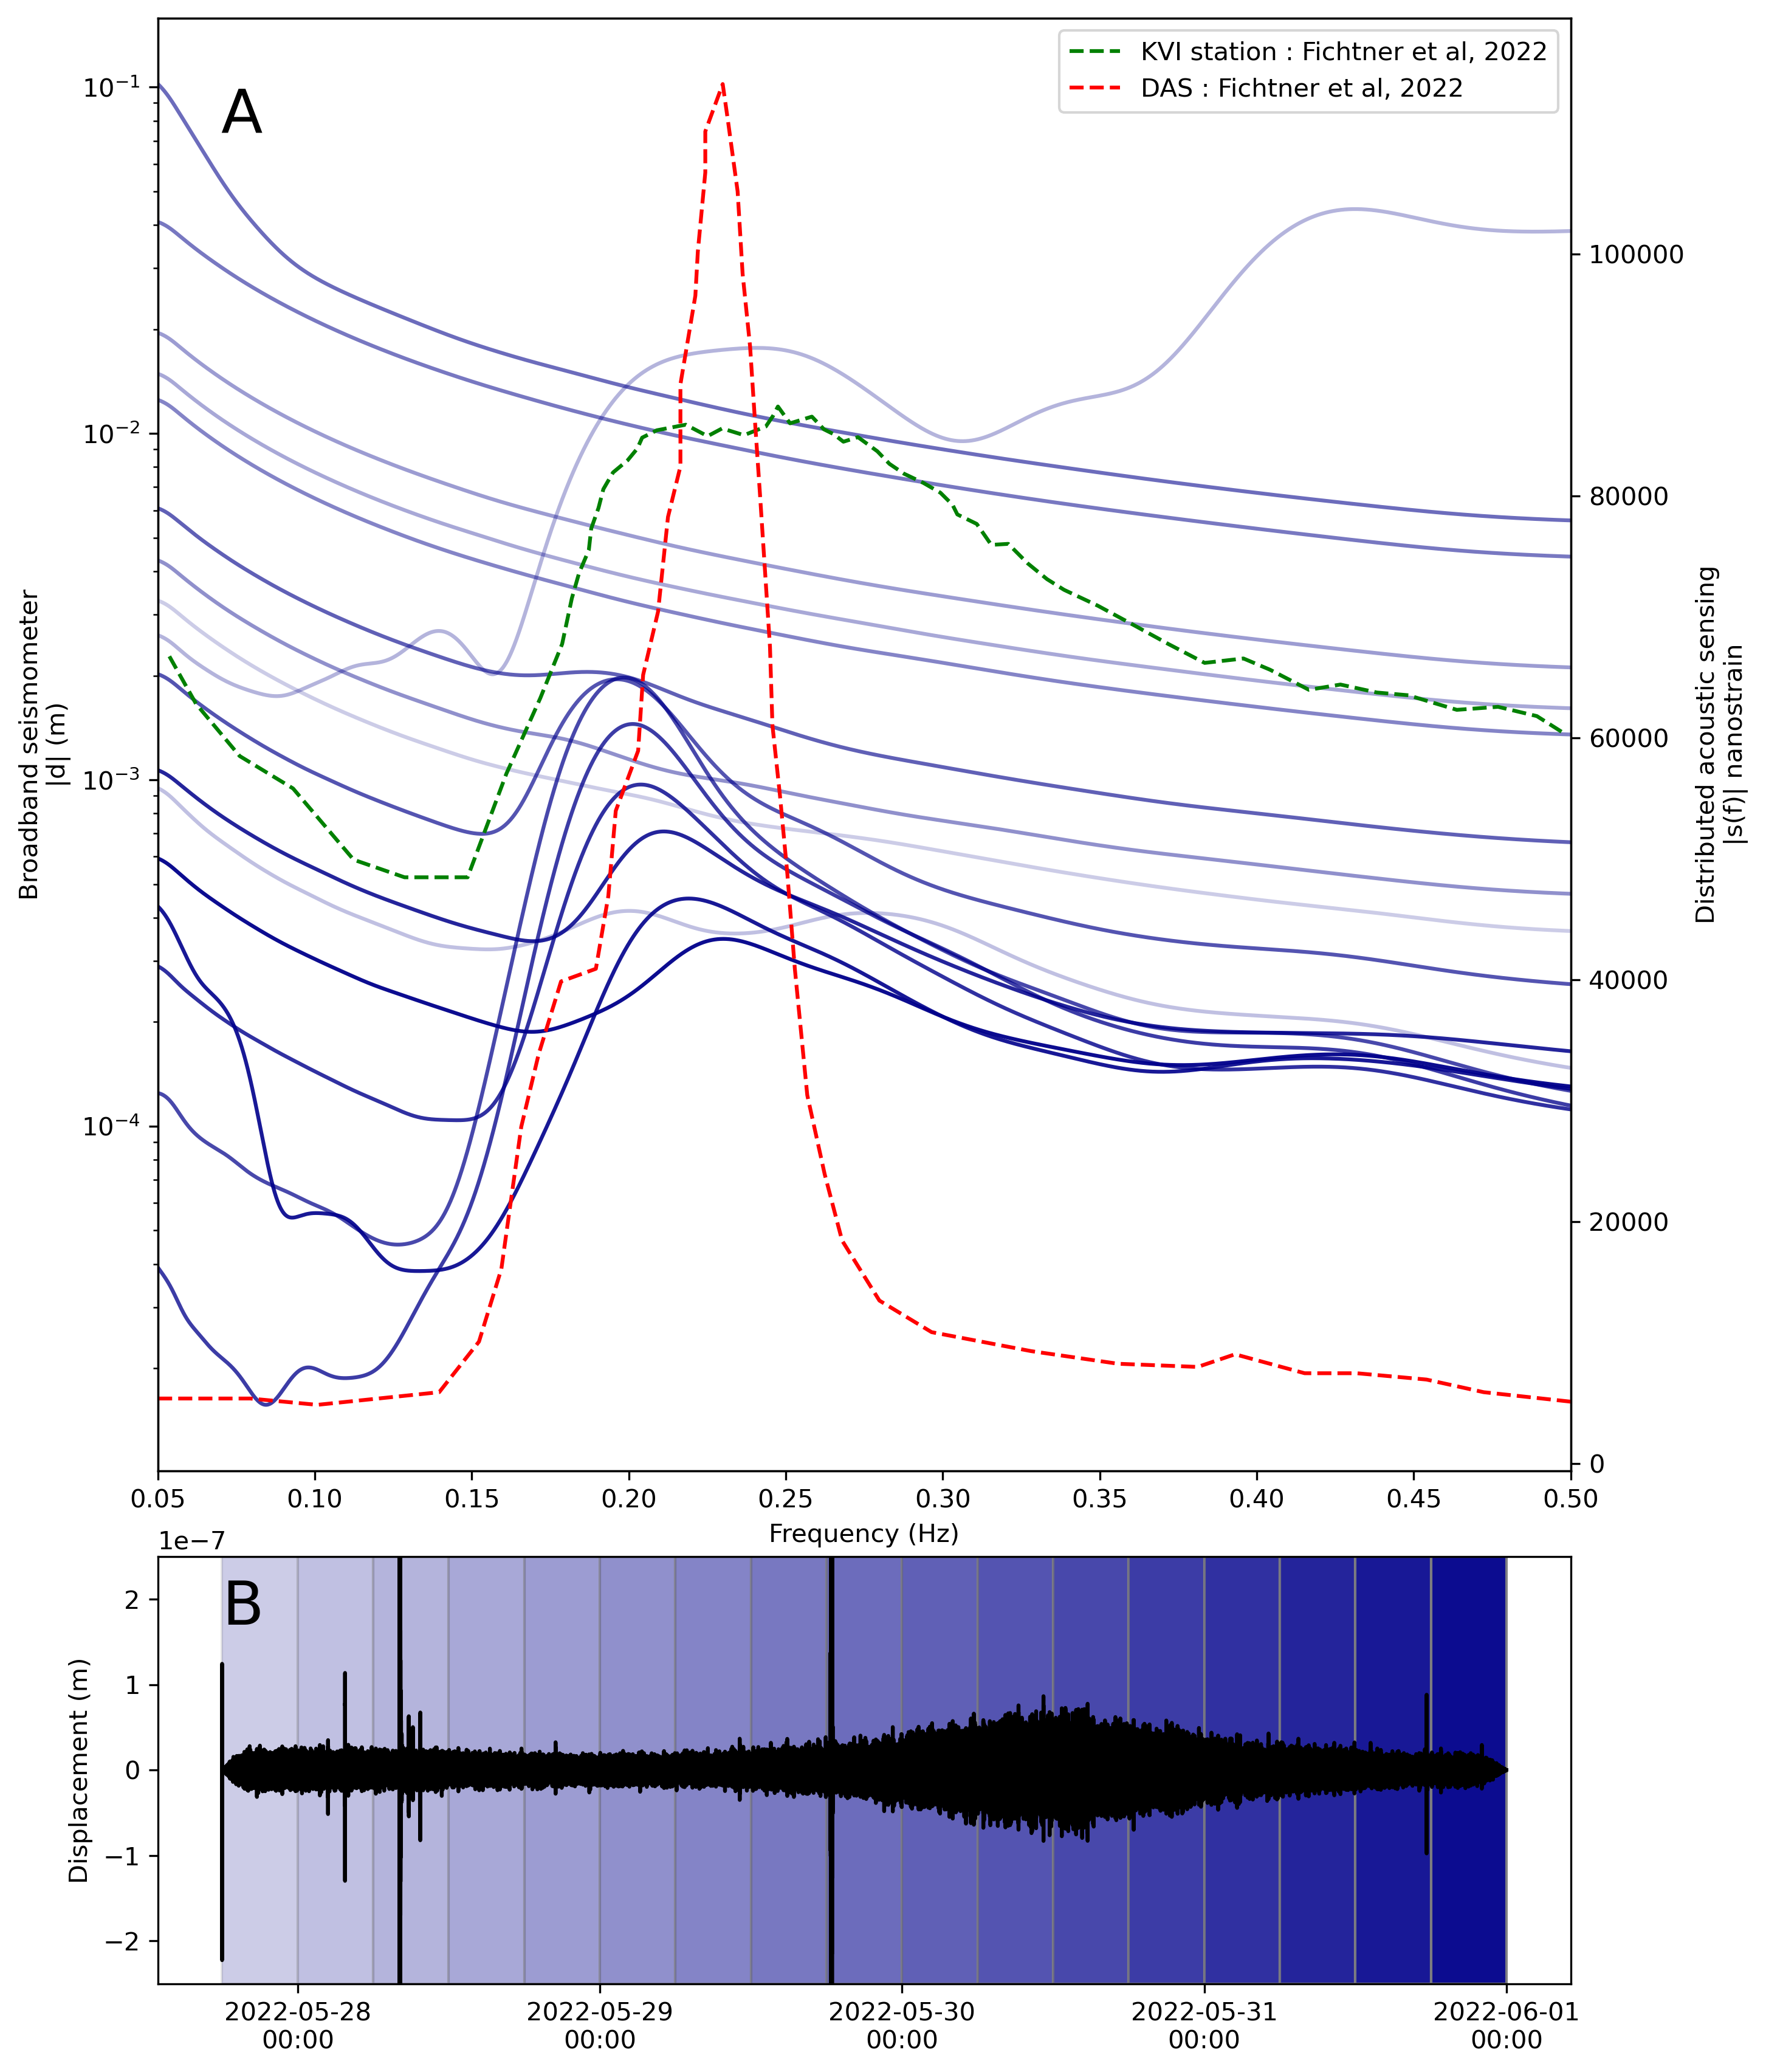

In [79]:
fig = plt.figure(figsize=(10,14), dpi=300) 
ax1 = plt.subplot2grid((4,1), (0,0), rowspan=3)
ax2 = plt.subplot2grid((4,1), (3,0))

maxF = []
out = []
header = []
KVI = pd.read_csv('./Grims_Varia/mean-KVI-fichtner.csv')
DAS = pd.read_csv('./Grims_Varia/mean-DAS-fichtner.csv')
for i in range(17) :
    sttdate = datetime.datetime(2022,5,27, 18, 0) + datetime.timedelta(hours=6*i)
    sttdate = UTCDateTime(sttdate.strftime('%Y-%m-%dT%H:%M:%S'))
    enddate = datetime.datetime(2022,5,27, 23, 59,59) + datetime.timedelta(hours=6*i)
    enddate = UTCDateTime(enddate.strftime('%Y-%m-%dT%H:%M:%S'))
        
    traceZ = obspy.read("./Grims_Varia/DISP-Corrected-HHZ_centaur-6_27052022to31052022.mseed", starttime = sttdate, endtime = enddate,)
    
    dt = np.arange(0,traceZ[0].stats.npts) #make array which its length = trace length
    dt = dt*traceZ[0].stats.delta #array of dt from starttime
    trtime = dt.astype('timedelta64[s]') + np.datetime64(traceZ[0].stats.starttime)
    
    #ftraceZ = traceZ.filter("highpass", freq=0.01)
    
    yf = scipy.fftpack.fft(traceZ[0])
    dt = traceZ[0].stats.delta
    npts = traceZ[0].stats.npts
    xf = np.linspace(0.0, 1.0/(dt), int(npts))
    
    if i == 0 :
        fmin =  find_nearest(xf, 0.05)
        fmax = find_nearest(xf, 0.5)
        f = xf[fmin:fmax]
   
        f15 = find_nearest(f, 0.15)
        f30 = find_nearest(f, 0.3)

    smoothed = fko.fast_konno_ohmachi(1*np.abs(yf[fmin:fmax]), xf[fmin:fmax], smooth_coeff=40, progress_bar=False)
    ax1.plot(xf[fmin:fmax], smoothed, c='darkblue', alpha=0.2+0.8*i/17)
    
    
    f0 = f[np.argmax(smoothed[f15:f30])+f15]
    A0 = np.max(smoothed[f15:f30])
    #print(f0)
    smmothed = list(smoothed)
    mid2, mid1, meanMH = mihauteur(smoothed, f,  f0)
    maxF.append([f0, A0, meanMH, mid2, mid1])

    
    if i == 0 :
        out.append(list(xf[fmin:fmax]))
        #print(len(list(xf[fmin:fmax])))
        header.append('frq')
        
    out.append(list(smoothed))
    #print(len(list(smoothed)))
    header.append(str(sttdate)+'-'+str(enddate))
axkvi, = ax1.plot(KVI.frq, KVI[' meters'], c='green', ls='--', label='KVI station : Fichtner et al, 2022')  
#plt.xscale('log')


traceZ = obspy.read("./Grims_Varia/DISP-Corrected-HHZ_centaur-6_27052022to31052022.mseed")
dt = np.arange(0,traceZ[0].stats.npts) #make array which its length = trace length
dt = dt*traceZ[0].stats.delta #array of dt from starttime
trtime = dt.astype('timedelta64[s]') + np.datetime64(traceZ[0].stats.starttime)
ftZ = traceZ.filter("highpass", freq=0.05).filter('lowpass', freq=0.5)

for i in range(17) :
    sttdate = np.datetime64('2022-05-27T18:00') + 6*60*i
    rect = mpt.Rectangle((sttdate,-0.25e-6), 6*60, .5e-6, facecolor='darkblue', alpha=0.2+0.8*i/17, edgecolor='grey')
    ax2.add_patch(rect)
    
ax2.plot(trtime, ftZ[0], c='k', zorder=10)
ax2.set_ylim(-.25e-6, .25e-6)

ax2.text(np.datetime64('2022-05-27T18:00:00'), 0.17e-6 , 'B', fontsize=24)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
ax2.set_ylabel('Displacement (m)')

ax1.set_yscale('log')
ax1.set_xlim(0.05,0.5)
#plt.ylim(1e-5,1e-1)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Broadband seismometer\n|d| (m)')

axb = ax1.twinx()
axb.text(0.07, 110000, 'A', fontsize=24)
arr1inds = DAS.frq.argsort()
sorted_frq = DAS.frq[arr1inds[::-1]]
sorted_nano = DAS[' nanostrain'][arr1inds[::-1]]

axdas, = axb.plot(sorted_frq, sorted_nano, c='r', ls='--', label='DAS : Fichtner et al, 2022')
axb.set_ylabel('Distributed acoustic sensing\n|s(f)| nanostrain')


plt.legend(handles = [axkvi, axdas], loc='upper right')
plt.show()

In [124]:
print('Full width at half maximum -- FWHF')
for i, elem in enumerate(maxF) :
    print('+++++++++')
    print(header[i+1])
    if elem[0] <= 0.15 :
        print('OUT OF RANGE')
    else :
        print('F0 : %.2f et A0 : %.2e +++ Mean FWHF : %.2f +++ FWHF left : %.3f Hz or dHz = %0.3f +++ FWHF right : %.3f Hz or dHz = %0.3f' %(elem[0], elem[1], elem[2], elem[3], elem[0] - elem[3], elem[4], elem[4] - elem[0]))
        #plt.scatter(elem[0], elem[1], c='r')

#plt.ylim(0, 0.0025)    
#plt.show()

Full width at half maximum -- FWHF
+++++++++
2022-05-27T18:00:00.000000Z-2022-05-28T00:00:00.000000Z
F0 : 0.19 et A0 : 3.54e-04 +++ Mean FWHF : 0.02 +++ FWHF left : 0.166 Hz or dHz = 0.026 +++ FWHF right : 0.215 Hz or dHz = 0.024
+++++++++
2022-05-28T00:00:00.000000Z-2022-05-28T06:00:00.000000Z
OUT OF RANGE
+++++++++
2022-05-28T06:00:00.000000Z-2022-05-28T12:00:00.000000Z
F0 : 0.24 et A0 : 1.77e-02 +++ Mean FWHF : 0.04 +++ FWHF left : 0.188 Hz or dHz = 0.053 +++ FWHF right : 0.274 Hz or dHz = 0.034
+++++++++
2022-05-28T12:00:00.000000Z-2022-05-28T18:00:00.000000Z
F0 : 0.17 et A0 : 5.19e-04 +++ Mean FWHF : 0.02 +++ FWHF left : 0.152 Hz or dHz = 0.014 +++ FWHF right : 0.186 Hz or dHz = 0.020
+++++++++
2022-05-28T18:00:00.000000Z-2022-05-29T00:00:00.000000Z
OUT OF RANGE
+++++++++
2022-05-29T00:00:00.000000Z-2022-05-29T06:00:00.000000Z
OUT OF RANGE
+++++++++
2022-05-29T06:00:00.000000Z-2022-05-29T12:00:00.000000Z
OUT OF RANGE
+++++++++
2022-05-29T12:00:00.000000Z-2022-05-29T18:00:00.000000

In [5]:
event = pd.read_csv('./Grims_Varia/event.csv')

In [6]:
event

,depth,event_id,event_type,latitude,longitude,magnitude,magnitude_type,originating_system,time
0,6,1072090,qu,63.895,-22.376,1.6,mlw,SIL picks,2022-05-27T18:03:48
1,10,1072091,qu,66.224,-18.566,0.6,mlw,SIL picks,2022-05-27T18:10:46
2,1,1072093,qu,63.869,-22.464,0.9,mlw,SIL picks,2022-05-27T18:12:13
3,3,1072095,qu,63.872,-22.468,1.7,mlw,SIL picks,2022-05-27T18:33:03
4,4,1072107,qu,65.169,-16.375,0.5,mlw,SIL picks,2022-05-27T20:11:39
...,...,...,...,...,...,...,...,...,...
616,5,1074057,qu,63.884,-22.383,0.4,mlw,SIL picks,2022-05-31T23:05:49
617,5,1074060,qu,63.884,-22.376,0.4,mlw,SIL picks,2022-05-31T23:30:19
618,4,1074063,qu,63.868,-22.432,1.5,mlw,SIL picks,2022-05-31T23:43:34
619,9,1074066,qu,63.278,-24.156,2.6,mlw,SIL picks,2022-05-31T23:49:18


In [7]:
import utm
import math
def utm_converter(X, Y) :
    outX = []
    outY = []
    print(len(X))
    for i in range(len(X)) :
        UTM = utm.from_latlon(Y[i],X[i], force_zone_letter='W', force_zone_number = 28)
        outX.append(UTM[0]), outY.append(UTM[1])
        print(UTM)
    return outX, outY

In [8]:


eventLongUTM, eventLatUTM = utm_converter(event.longitude, event.latitude,)



ssLat = [64.408255]
ssLong = [-17.346976]

ssLongUTM, ssLatUTM = utm_converter(ssLong, ssLat)

621
(138484.9516744422, 7106250.084766736, 28, 'W')
(339642.27364124916, 7349446.723874367, 28, 'W')
(133847.79090636782, 7103870.654393772, 28, 'W')
(133691.38927396951, 7104226.207305742, 28, 'W')
(435573.5310638345, 7227991.149805381, 28, 'W')
(138143.03605728806, 7106289.8503147, 28, 'W')
(136780.9999779993, 7103527.044246384, 28, 'W')
(406633.58217673504, 7357691.5487485565, 28, 'W')
(160970.90616603498, 7105626.804455788, 28, 'W')
(380619.91228563705, 7387916.394298225, 28, 'W')
(153484.1787292614, 7104992.2950470755, 28, 'W')
(380221.1464304328, 7387933.63527709, 28, 'W')
(134724.59362526675, 7103318.133839646, 28, 'W')
(154534.45867364056, 7104650.937661656, 28, 'W')
(134271.53843445436, 7103258.937329422, 28, 'W')
(437742.80729949963, 7221924.767044511, 28, 'W')
(159408.70435984468, 7104450.408832654, 28, 'W')
(290025.90941415075, 7097276.404557661, 28, 'W')
(417490.893906259, 7178823.316355212, 28, 'W')
(133717.4119136692, 7102762.157864373, 28, 'W')
(437811.000646596, 722069

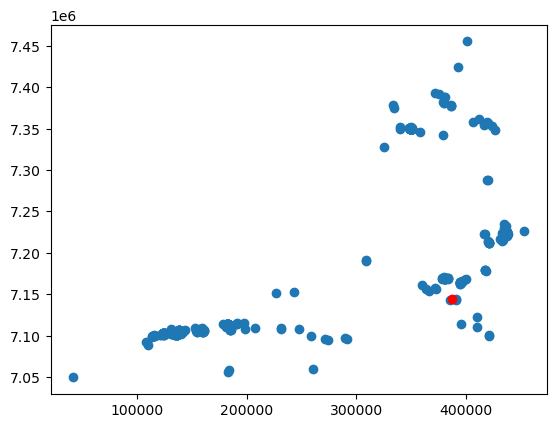

In [9]:
plt.scatter(eventLongUTM, eventLatUTM)
plt.scatter(ssLongUTM, ssLatUTM, c='r')

In [10]:
pd.DataFrame(np.array([eventLongUTM, eventLatUTM]).transpose(), columns=['UTM X', 'UTM Y']).to_csv('./verif_points.csv')

In [11]:
dfromStt = np.sqrt((np.array(eventLongUTM) - np.array(ssLongUTM))**2 + (np.array(eventLatUTM) - np.array(ssLatUTM))**2)

In [12]:
tevent = event.time.astype(np.datetime64)

In [13]:
import pyproj
def azimuth(long1, lat1, long2, lat2) :
    geodesic = pyproj.Geod(ellps='WGS84')
    fwd_azimuth,back_azimuth,distance = geodesic.inv(long1, lat1, long2, lat2)
    return(fwd_azimuth)

In [14]:
import numpy
import math

def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = numpy.arctan2(x,y)
    brng = numpy.degrees(brng)

    return brng

In [15]:
azi = []
for i, x in enumerate(event.longitude) :
    azi.append(azimuth(ssLong[0], ssLat[0], event.longitude[i], event.latitude[i]))

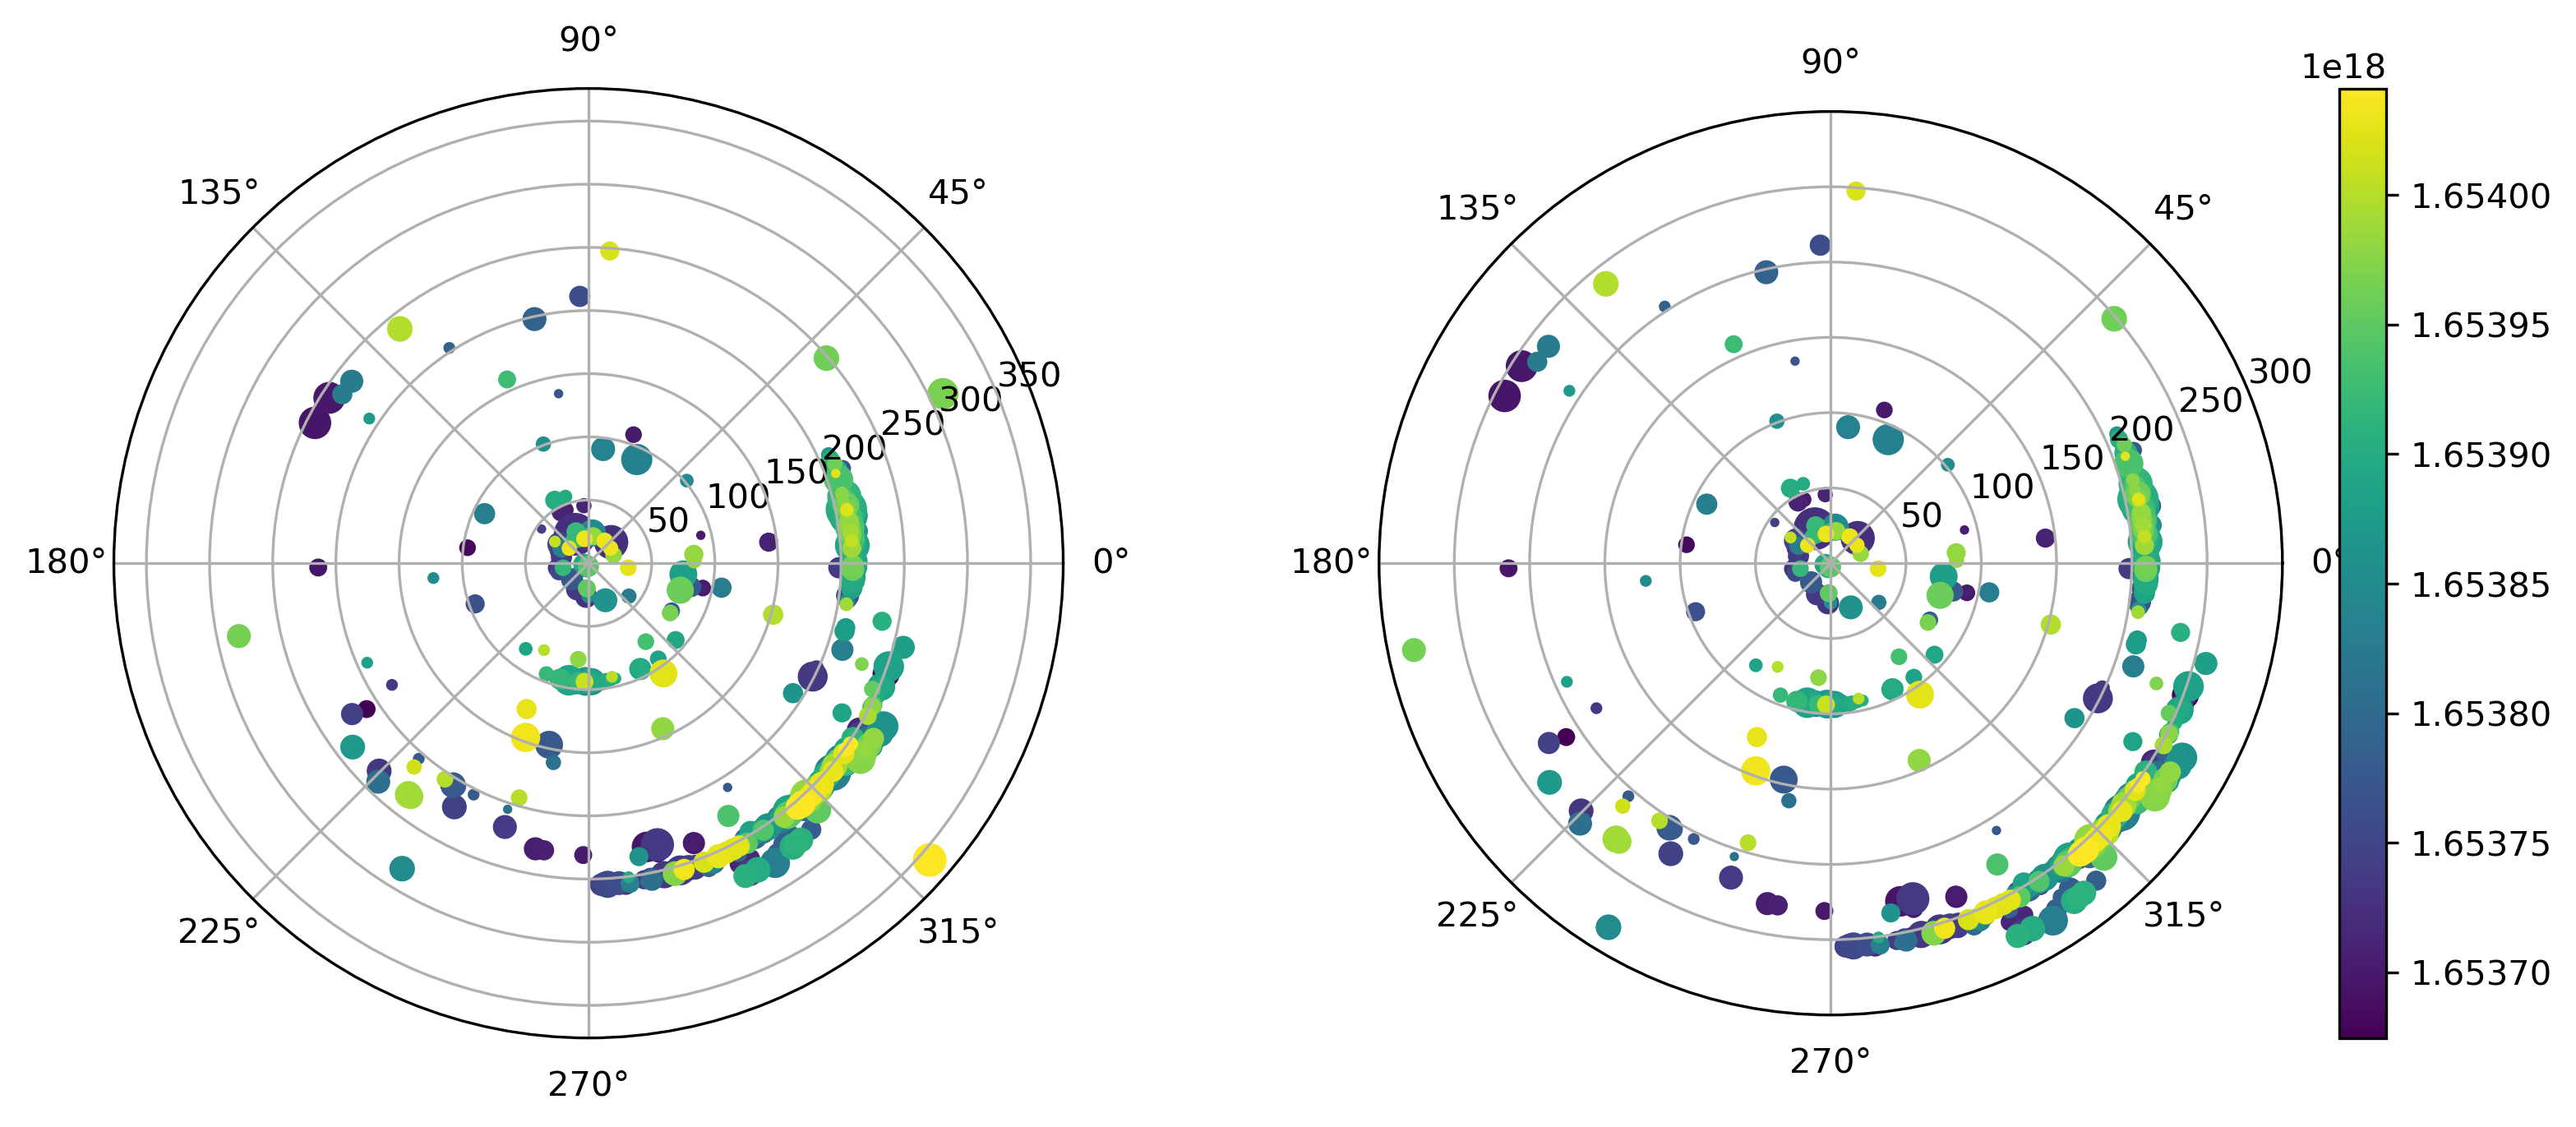

In [16]:
fig, ax = plt.subplots(ncols = 2, subplot_kw={"projection":"polar"}, dpi=300, figsize=(13,5))
ax[0].scatter(np.array(azi), dfromStt/1000,  s=event.magnitude*30, c=tevent)
a = ax[1].scatter(np.array(azi), dfromStt/1000,  s=event.magnitude*30, c=tevent)
ax[1].set_ylim(0,300)
fig.colorbar(a)

Text(2022-05-27T18:00:00, 1.7e-07, 'C')

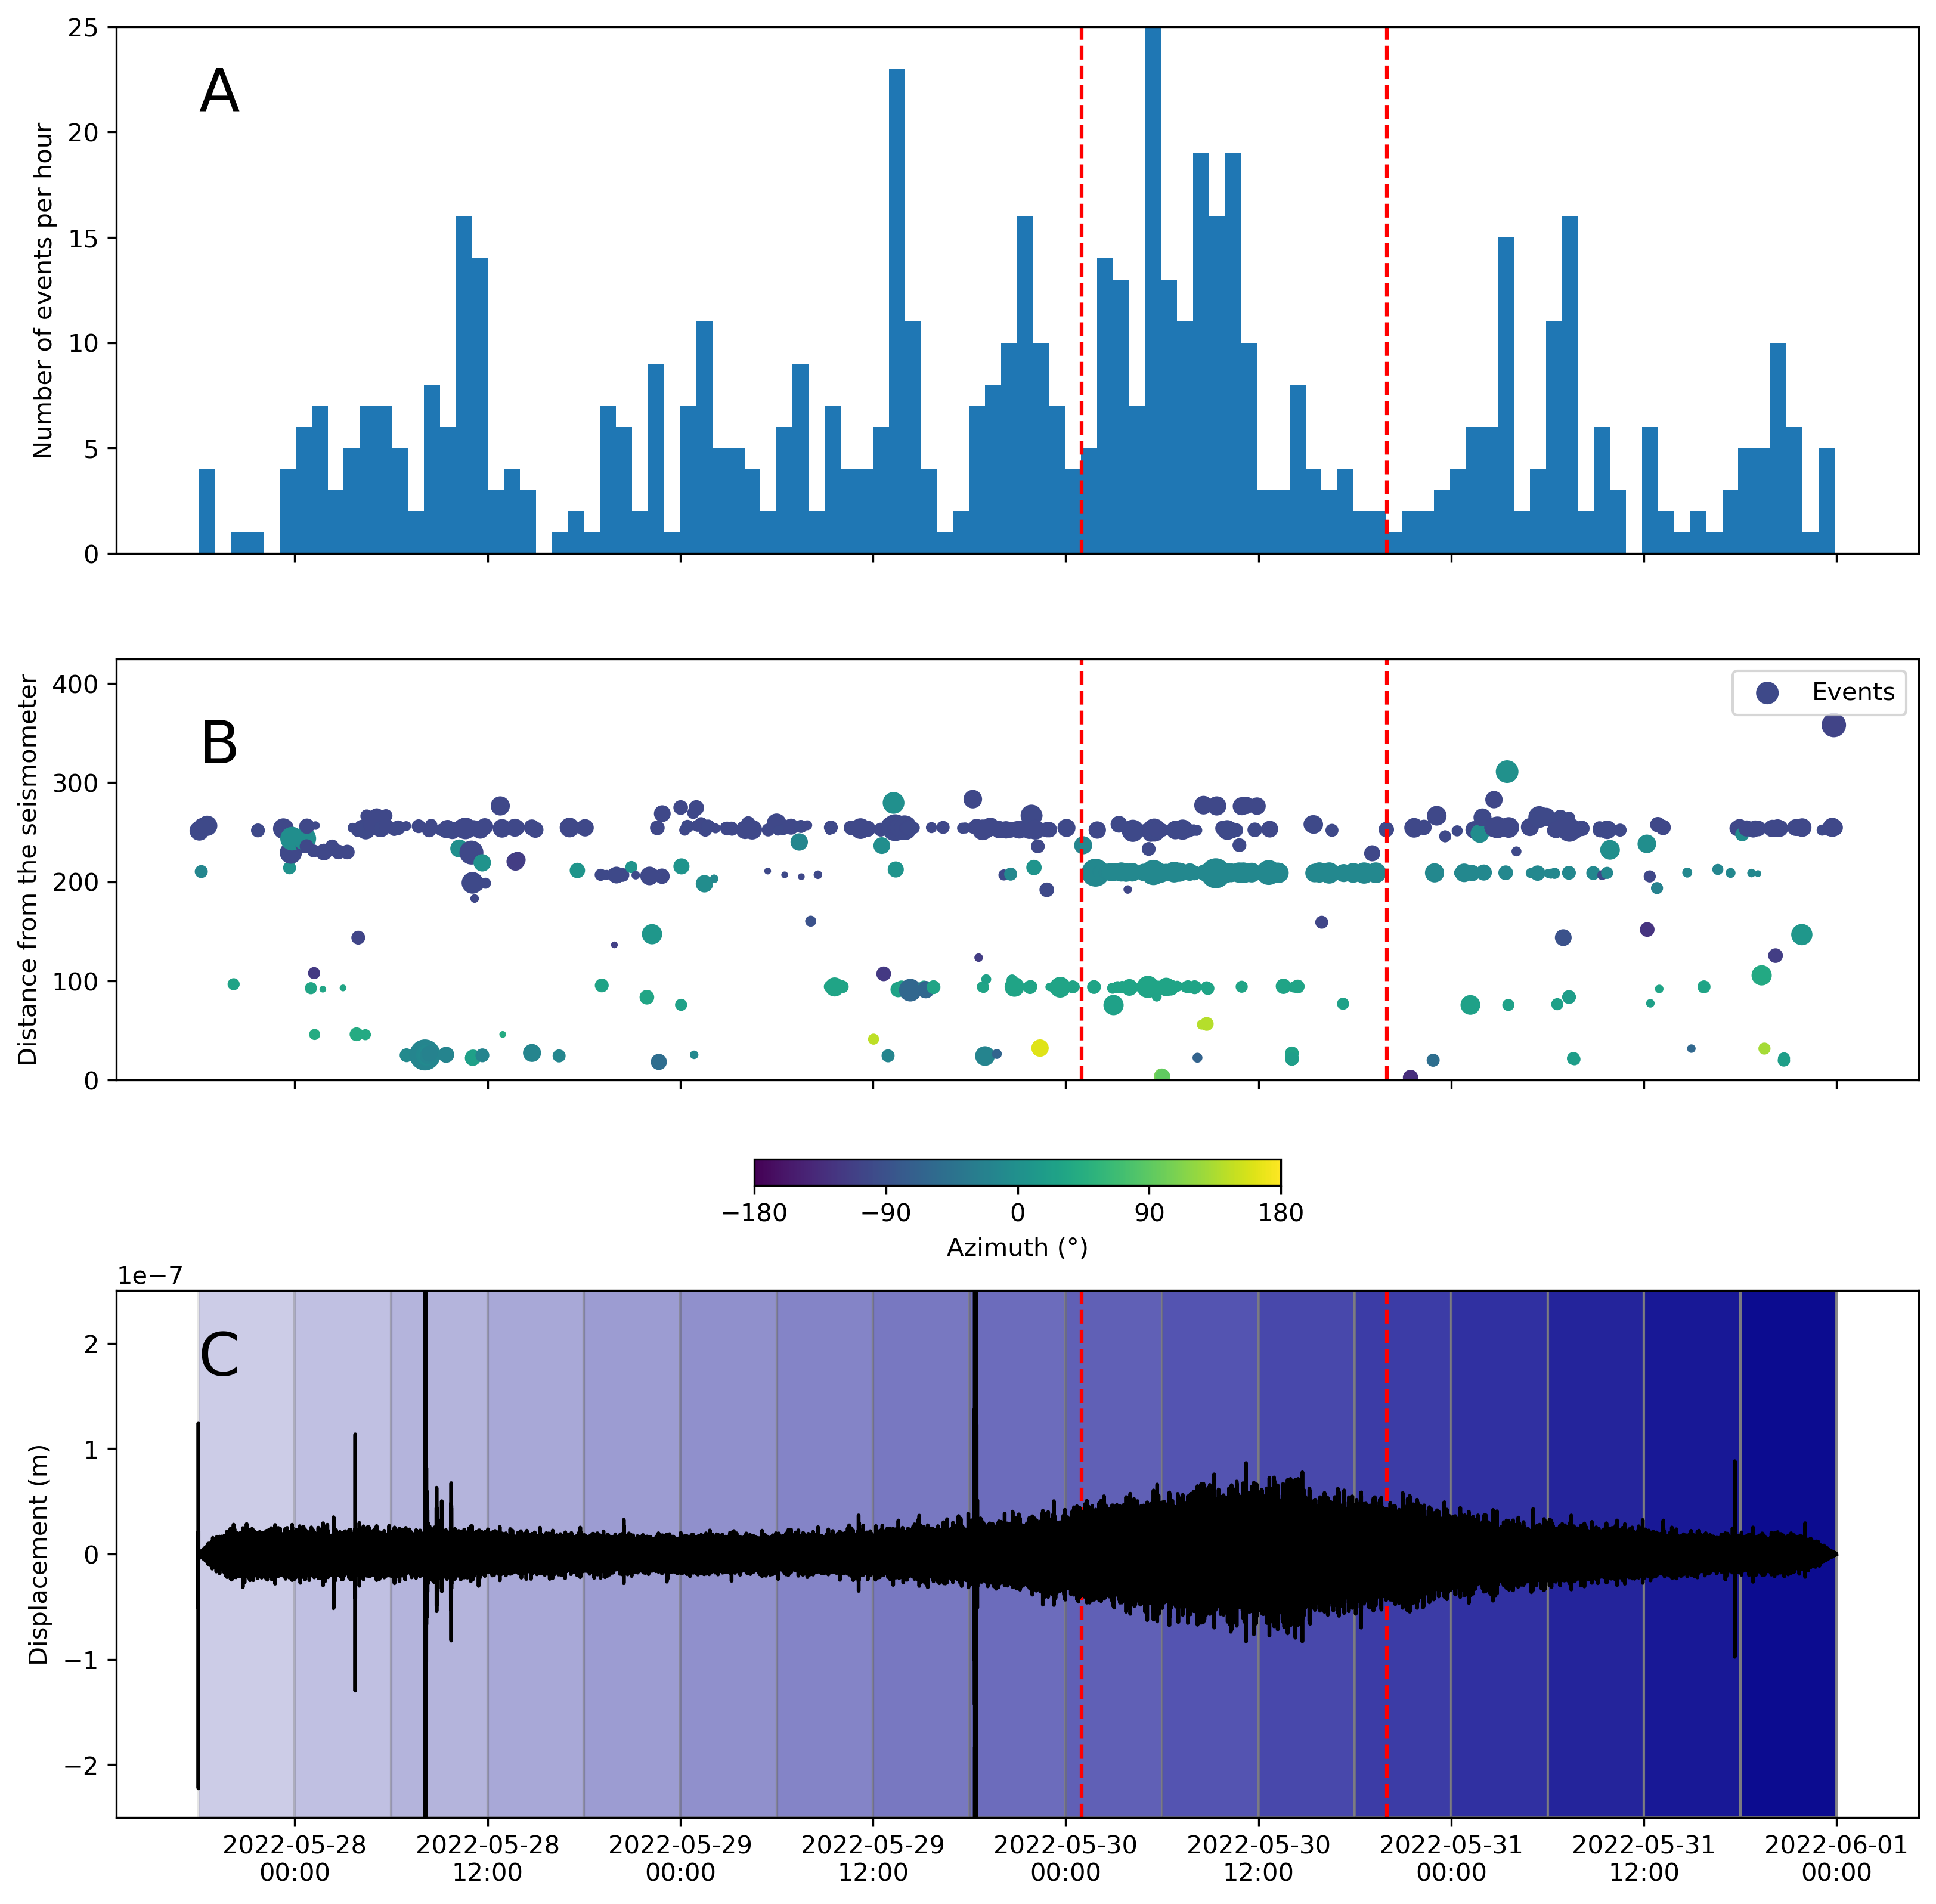

In [22]:
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.patches as mpt

fig, ax = plt.subplots(nrows=3,dpi=300, figsize=(13,13), sharex=True)
ax[0].hist(tevent, bins=102)
ax[0].plot([np.datetime64('2022-05-30T01:00'),np.datetime64('2022-05-30T01:00')], [0, 25],c='r', ls='--')
ax[0].plot([np.datetime64('2022-05-30T20:00'),np.datetime64('2022-05-30T20:00')], [0, 25],c='r', ls='--') 
ax[0].set_ylim(0, 25)
ax[0].set_ylabel('Number of events per hour')
ax[0].text(np.datetime64('2022-05-27T18:00:00'), 21 , 'A', fontsize=24)

norm = colors.Normalize(vmin=-180,vmax=180)
aa = ax[1].scatter(tevent, dfromStt/1000, s=event.magnitude*30, norm=norm, c=azi, label='Events')
ax[1].set_ylabel('Distance from the seismometer')

fig.colorbar(aa, orientation='horizontal', fraction = 0.05, aspect = 20, label='Azimuth (°)',ticks=[-180,-90,0,90,180])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
ax[1].plot([np.datetime64('2022-05-30T01:00'),np.datetime64('2022-05-30T01:00')], [0, 425],c='r', ls='--')
ax[1].plot([np.datetime64('2022-05-30T20:00'),np.datetime64('2022-05-30T20:00')], [0, 425],c='r', ls='--') 
ax[1].set_ylim(0, 425)
ax[1].legend()
ax[1].text(np.datetime64('2022-05-27T18:00:00'), 320 , 'B', fontsize=24)

traceZ = obspy.read("./Grims_Varia/DISP-Corrected-HHZ_centaur-6_27052022to31052022.mseed")
dt = np.arange(0,traceZ[0].stats.npts) #make array which its length = trace length
dt = dt*traceZ[0].stats.delta #array of dt from starttime
trtime = dt.astype('timedelta64[s]') + np.datetime64(traceZ[0].stats.starttime)
ftZ = traceZ.filter("highpass", freq=0.05).filter('lowpass', freq=0.5)

for i in range(17) :
    sttdate = np.datetime64('2022-05-27T18:00') + 6*60*i
    rect = mpt.Rectangle((sttdate,-0.25e-6), 6*60, .5e-6, facecolor='darkblue', alpha=0.2+0.8*i/17, edgecolor='grey')
    ax[2].add_patch(rect)
    
ax[2].plot(trtime, ftZ[0], c='k', zorder=10)
ax[2].set_ylim(-.25e-6, .25e-6)
ax[2].set_ylabel('Displacement (m)')
ax[2].plot([np.datetime64('2022-05-30T01:00'),np.datetime64('2022-05-30T01:00')], [-.25e-6, .25e-6],c='r', ls='--')
ax[2].plot([np.datetime64('2022-05-30T20:00'),np.datetime64('2022-05-30T20:00')], [-.25e-6, .25e-6],c='r', ls='--')
ax[2].text(np.datetime64('2022-05-27T18:00:00'), 0.17e-6 , 'C', fontsize=24)